In [198]:
import tensorflow as tf
import numpy as np

In [199]:
np.random.seed(101)
tf.set_random_seed(101)

In [200]:
a = tf.placeholder(tf.float32)

In [201]:
b = tf.placeholder(tf.float32)

In [202]:
op_add = a+b

In [203]:
sess = tf.InteractiveSession()

In [204]:
sess.run(op_add, feed_dict={a:10, b:20})

30.0

In [205]:
rand_a = np.random.uniform(0,100, (5,5))

In [206]:
rand_b = np.random.uniform(0,100, (5,1))

In [207]:
sess.run(op_add, feed_dict={a:rand_a, b:rand_b})

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [208]:
mul = a*b

In [209]:
sess.run(mul, feed_dict={a:rand_a, b: rand_b})

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

In [210]:
#Example

In [211]:
n_features =10
n_dense_nueorons = 3

In [212]:
w = tf.Variable(tf.random_normal((n_features, n_dense_nueorons)))

In [213]:
x = tf.placeholder(tf.float32, (None, n_features))

In [214]:
b = tf.Variable(tf.ones([n_dense_nueorons]))

In [215]:
mul = tf.matmul(x,w)

In [216]:
z = tf.add(mul, b)

In [217]:
a = tf.sigmoid(z)

In [218]:
sess.run(tf.global_variables_initializer())

In [219]:
layer_out = sess.run(a, feed_dict = {x: np.random.random([1,n_features])})

In [220]:
print(layer_out)

[[0.9904665  0.97048664 0.24349378]]


In [221]:
## Simple Regression

In [222]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [223]:
print(x_data)

[-1.20856056 -0.08034641  2.82674411  4.50477294  3.42312535  4.88227319
  7.18414126  6.77068715  9.4930023   9.96290567]


In [224]:
y_data = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)

In [225]:
print(y_data)

[0.5420333  1.17575569 0.85241231 2.50514314 4.67005971 4.41685654
 6.66701681 6.69180648 7.54731409 9.03483077]


In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

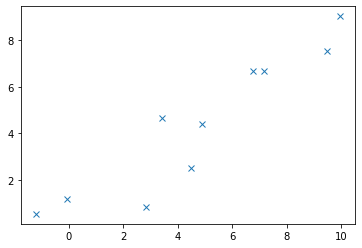

In [227]:
plt.plot(x_data, y_data, 'x')

In [228]:
# y=mx+b

In [229]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [230]:
m = tf.Variable(0.42)

In [231]:
b = tf.Variable(0.65)

In [232]:
error = 0
for x,y in zip(x_data, y_data):
    y_hat = m*x+b
    error += (y-y_hat)**2
    

In [233]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [234]:
train = optimizer.minimize(error)

In [235]:
sess.run(tf.global_variables_initializer())

In [236]:
iterations = 100

In [237]:
for i in range(iterations):
    sess.run(train)
m, b = sess.run([m,b])

In [238]:
print(m)

0.7681001


In [239]:
print(b)

0.73076344


In [240]:
x_test = np.linspace(-1,11,10)

In [241]:
y_pred = m*x_test + b

In [242]:
print(y_pred)

[-0.03733665  0.9867968   2.01093024  3.03506368  4.05919713  5.08333057
  6.10746402  7.13159746  8.1557309   9.17986435]


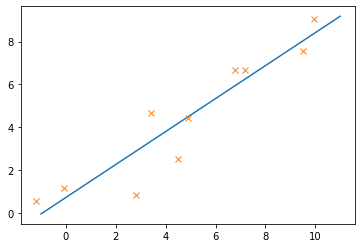

In [243]:
plt.plot(x_test, y_pred)
plt.plot(x_data, y_data, 'x')